## Decision Trees

In this *Jupyter Notebook*, we will learn a popular machine learning algorithm, Decision Tree. We will use this classification algorithm to build a model from historical data of patients, and their response to different medications. Then we use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

### The dataset

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to. 

It is a sample of binary classifier, and you can use the training part of the dataset 
to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.

We'll make use of drug.csv dataset: `data/drug.csv`.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### Load the data

In [2]:
path = 'data/drug.csv'

drug_df = pd.read_csv(path, delimiter=',')
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Let's print the shape of the data

In [3]:
drug_df.shape

(200, 6)

### Pre-processing

Using **drug_df** as the drug.csv data read by pandas, declare the following variables:
- `X` as the `Feature Matrix` (data of drug_df)
- `y` as the `reponse vector` (target)

Remove the column containing the target name since it doesn't contain numeric values.

In [4]:
X = drug_df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As we can see, some featurs in this dataset are catergorical such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. `pandas.get_dummies()` converts categorical variable into dummy/indicator variables.

In [5]:
# Import sklearn's preprocessing

from sklearn import preprocessing

In [6]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.

In [7]:
y = drug_df['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

### Setting up the Decision Tree

We will be using `train/test split` on our decision tree. Let's import `train_test_split` from `sklearn.model_selection`.

In [8]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_train, X_test, y_train, y_test <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [10]:
# Print the shape of X_train and y_train

print(X_train.shape)
print(y_train.shape)

(140, 5)
(140,)


In [11]:
# Print the shape of X_test and y_test

print(X_test.shape)
print(y_test.shape)

(60, 5)
(60,)


### Modeling

We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [12]:
drug_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drug_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we'll fit the data with the training feature matrix `X_train` and training response vector `y_train`.

In [13]:
drug_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction

Let's make some predictions on the testing dataset and store it into a variable called `y_pred`.

In [14]:
y_pred = drug_tree.predict(X_test)

Let's print the pred_tree and y_test to visually compare the prediction with the actual values.

In [15]:
print(y_pred[0:5])
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


### Evaluation

Next, let's import `metrics` from `sklearn` to check the accuracy of our model.

In [16]:
# Import metrics

from sklearn import metrics

In [17]:
# Print the accuracy

print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTree's Accuracy:  0.9833333333333333


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


### Accuracy without using sklearn

In [18]:
# Calculate the accuracy without using sklearn
no_matches = (y_pred == y_test.values).sum()
calc_acc = no_matches / y_test.size

# Print the accuracy
print("DecisionTree's Accuracy: ", calc_acc)

DecisionTree's Accuracy:  0.9833333333333333


### Visualization

Let's visualize the tree

In [19]:
# Import the required modules

from sklearn.externals.six import StringIO
from sklearn import tree

import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('ggplot')
%matplotlib inline

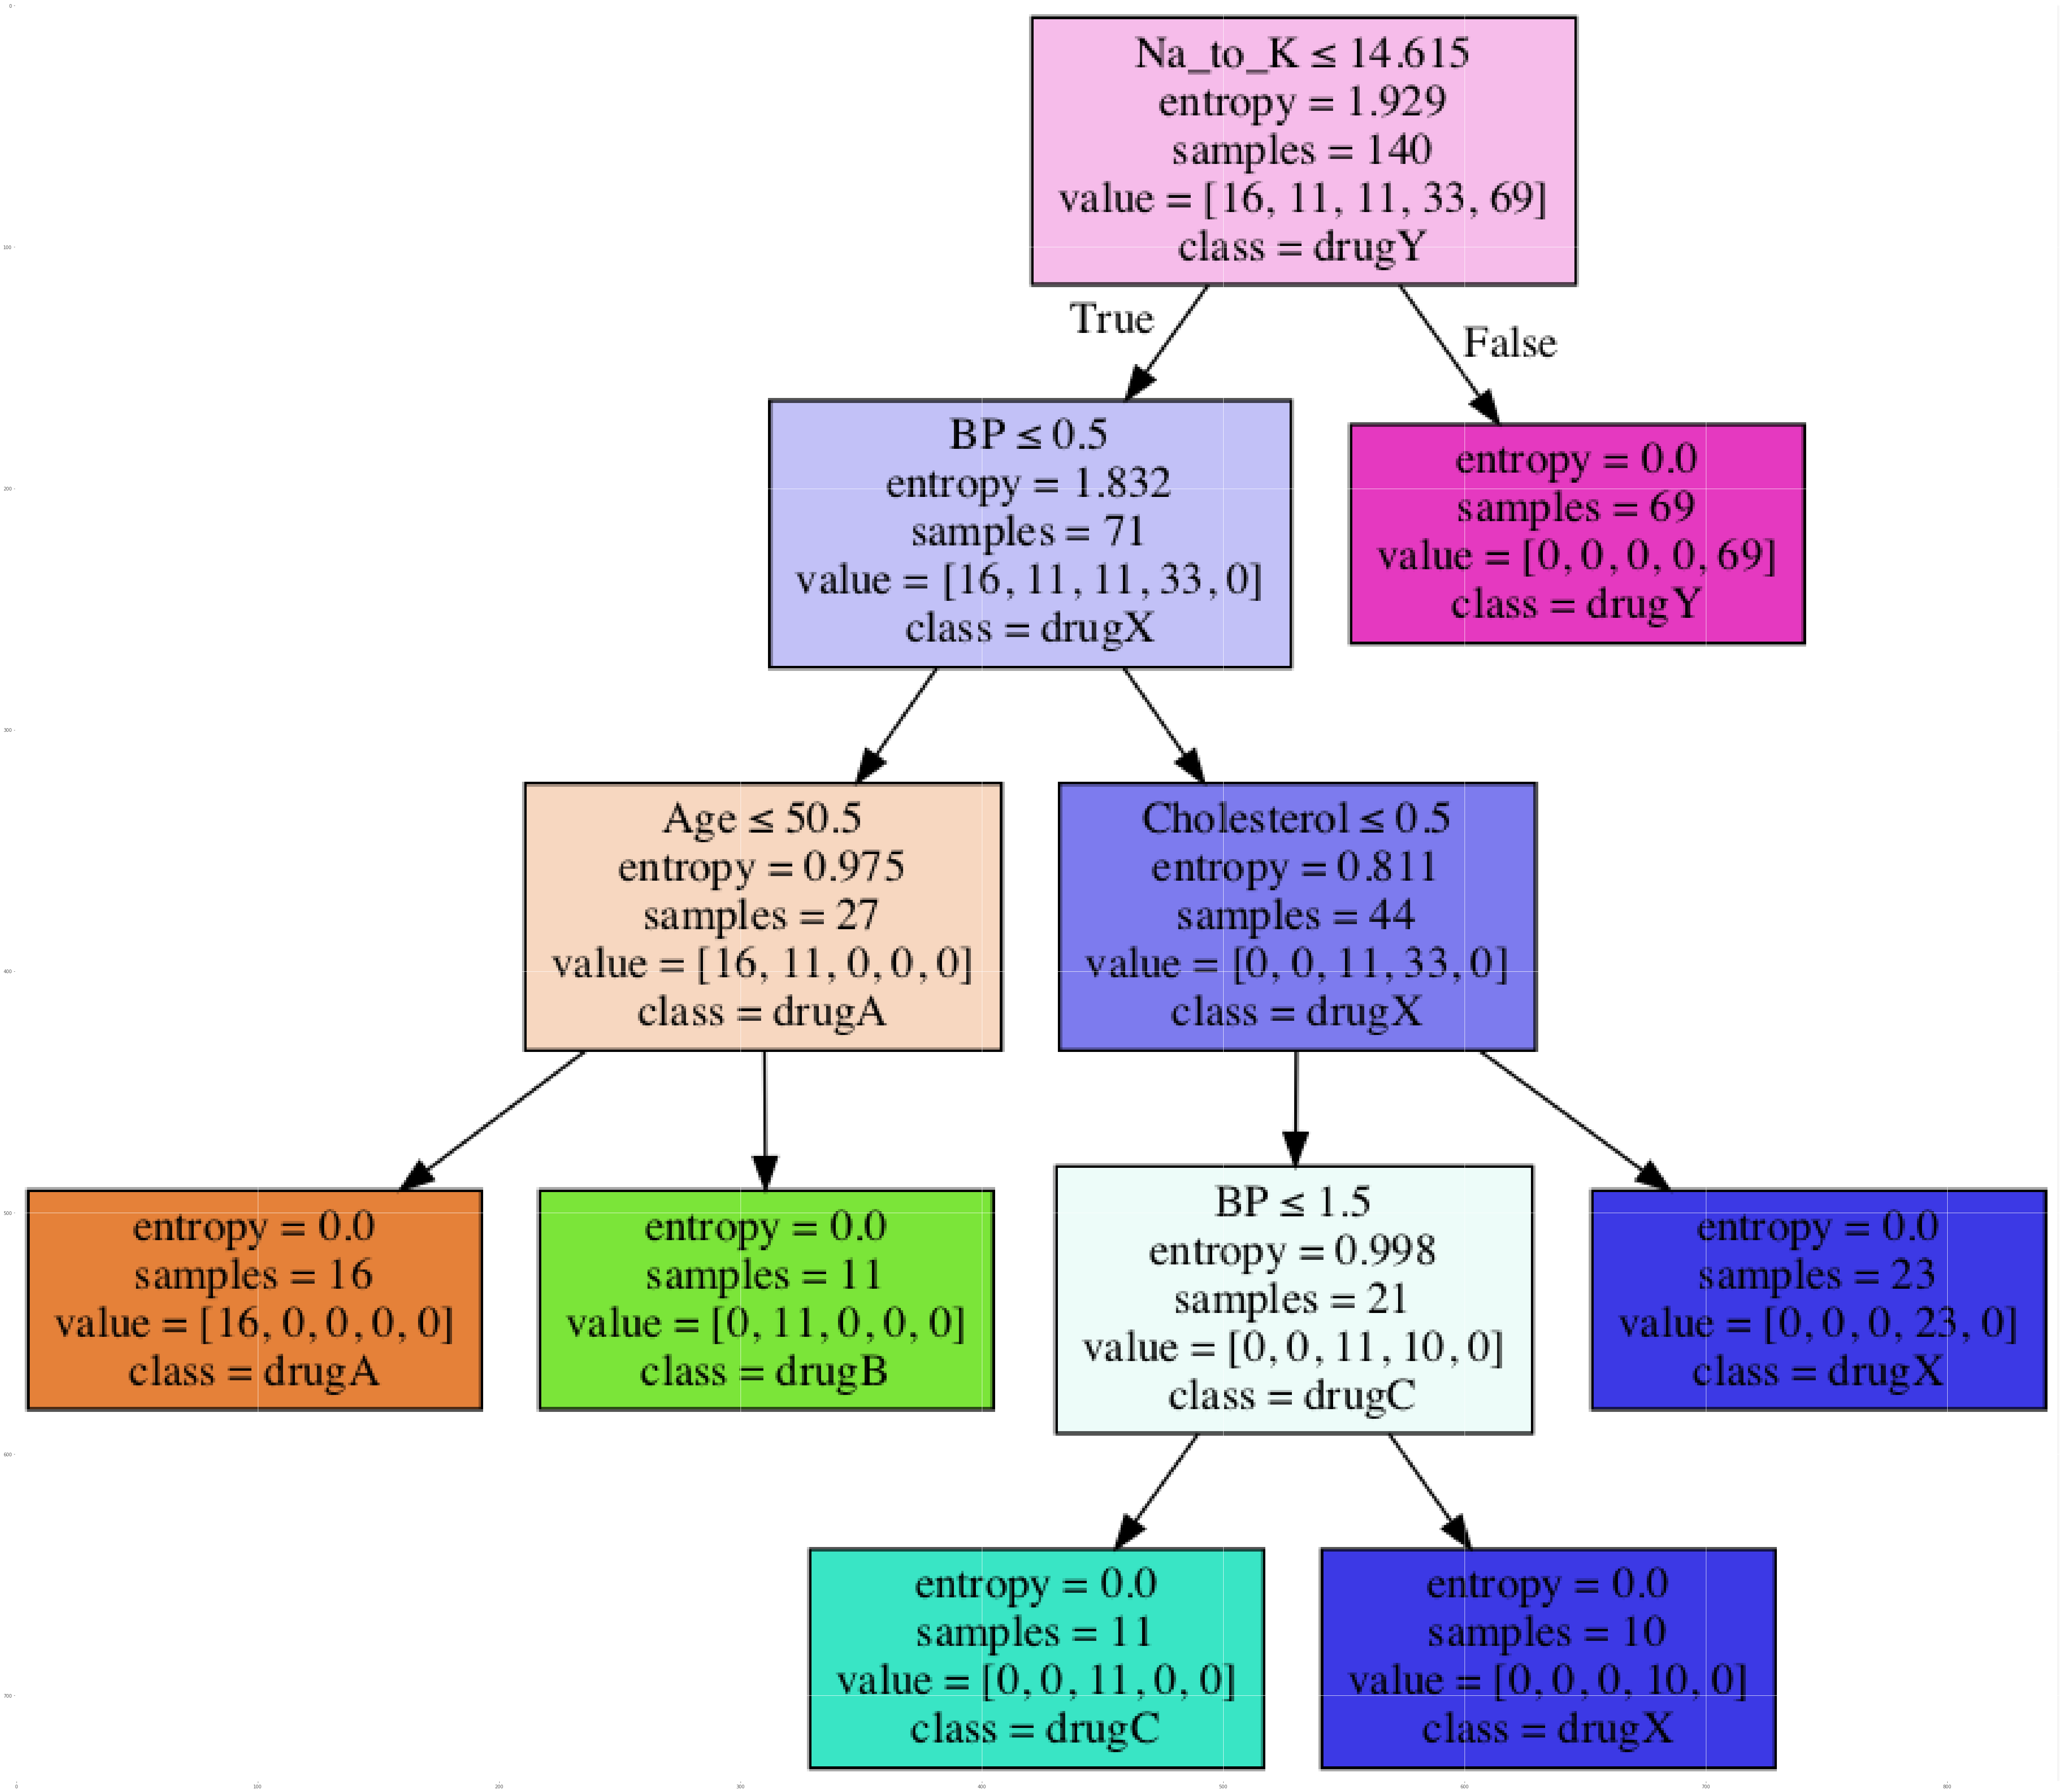

In [20]:
dot_data = StringIO()
filename = 'images/drugtree.png'
feature_names = drug_df.columns[0:5]
target_names = drug_df['Drug'].unique().tolist()
out = tree.export_graphviz(drug_tree, feature_names=feature_names, out_file=dot_data, 
                           class_names=np.unique(y_train), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(80, 160))
plt.imshow(img, interpolation='nearest')